In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
# loading the data
bdf = pd.read_csv('Bowler_data.csv')
bdf.head(10)

,Unnamed: 0,Overs,Mdns,Runs,Wkts,Econ,Ave,SR,Opposition,Ground,Start Date,Match_ID,Bowler,Player_ID
0,1,8.0,0,57,0,7.12,-,-,v India,Nagpur,18 Dec 2009,ODI # 2933,Suranga Lakmal,49619
1,2,10.0,0,55,2,5.50,27.50,30.0,v India,Kolkata,24 Dec 2009,ODI # 2935,Suranga Lakmal,49619
2,3,-,-,-,-,-,-,-,v India,Delhi,27 Dec 2009,ODI # 2936,Suranga Lakmal,49619
3,4,9.0,1,63,2,7.00,31.50,27.0,v Bangladesh,Dhaka,4 Jan 2010,ODI # 2937,Suranga Lakmal,49619
4,5,8.0,1,48,0,6.00,-,-,v India,Dhaka,5 Jan 2010,ODI # 2938,Suranga Lakmal,49619
5,6,10.0,0,75,0,7.50,-,-,v India,Dhaka,10 Jan 2010,ODI # 2941,Suranga Lakmal,49619
6,7,7.0,0,52,2,7.42,26.00,21.0,v England,The Oval,28 Jun 2011,ODI # 3165,Suranga Lakmal,49619
7,8,7.5,0,43,3,5.48,14.33,15.6,v England,Leeds,1 Jul 2011,ODI # 3167,Suranga Lakmal,49619
8,9,10.0,0,62,2,6.20,31.00,30.0,v England,Lord's,3 Jul 2011,ODI # 3168,Suranga Lakmal,49619
9,10,2.0,0,12,0,6.00,-,-,v England,Nottingham,6 Jul 2011,ODI # 3169,Suranga Lakmal,49619


In [4]:
#Dropping all the values with '-' in Overs
bdf.drop(bdf[bdf.Overs == '-'].index, inplace=True)
bdf.head()

,Unnamed: 0,Overs,Mdns,Runs,Wkts,Econ,Ave,SR,Opposition,Ground,Start Date,Match_ID,Bowler,Player_ID
0,1,8.0,0,57,0,7.12,-,-,v India,Nagpur,18 Dec 2009,ODI # 2933,Suranga Lakmal,49619
1,2,10.0,0,55,2,5.50,27.50,30.0,v India,Kolkata,24 Dec 2009,ODI # 2935,Suranga Lakmal,49619
3,4,9.0,1,63,2,7.00,31.50,27.0,v Bangladesh,Dhaka,4 Jan 2010,ODI # 2937,Suranga Lakmal,49619
4,5,8.0,1,48,0,6.00,-,-,v India,Dhaka,5 Jan 2010,ODI # 2938,Suranga Lakmal,49619
5,6,10.0,0,75,0,7.50,-,-,v India,Dhaka,10 Jan 2010,ODI # 2941,Suranga Lakmal,49619


In [5]:
#seeing the d-types of all the data
bdf.dtypes

Unnamed: 0     int64
Overs         object
Mdns          object
Runs          object
Wkts          object
Econ          object
Ave           object
SR            object
Opposition    object
Ground        object
Start Date    object
Match_ID      object
Bowler        object
Player_ID      int64
dtype: object

In [6]:
#Replacing all the '-' with 0s to make the dtypes of a column uniform
bdf['Mdns'] = bdf['Mdns'].str.replace('-', '0')
bdf['Runs'] = bdf['Runs'].str.replace('-', '0')
bdf['Wkts'] = bdf['Wkts'].str.replace('-', '0')
bdf['Econ'] = bdf['Econ'].str.replace('-', '0')
bdf['Ave'] = bdf['Ave'].str.replace('-', '0')
bdf['SR'] = bdf['SR'].str.replace('-', '0')

In [7]:
#Converting the dtypes of certain columns into float to perform operations
bdf['Overs'] = bdf['Overs'].astype(float)
bdf['Mdns'] = bdf['Mdns'].astype(float)
bdf['Runs'] = bdf['Runs'].astype(float)
bdf['Wkts'] = bdf['Wkts'].astype(float)
bdf['Econ'] = bdf['Econ'].astype(float)
bdf['Ave'] = bdf['Ave'].astype(float)
bdf['SR'] = bdf['SR'].astype(float)
bdf.dtypes

Unnamed: 0      int64
Overs         float64
Mdns          float64
Runs          float64
Wkts          float64
Econ          float64
Ave           float64
SR            float64
Opposition     object
Ground         object
Start Date     object
Match_ID       object
Bowler         object
Player_ID       int64
dtype: object

In [8]:
#Highest Number of Wickets
bdf.loc[bdf['Wkts']==bdf['Wkts'].max()]

,Unnamed: 0,Overs,Mdns,Runs,Wkts,Econ,Ave,SR,Opposition,Ground,Start Date,Match_ID,Bowler,Player_ID
2056,2057,9.0,0.0,45.0,7.0,5.00,6.42,7.7,v West Indies,Basseterre,15 Jun 2016,ODI # 3747,Imran Tahir,40618
4933,4934,10.0,3.0,34.0,7.0,3.40,4.85,8.5,v West Indies,Christchurch,23 Dec 2017,ODI # 3944,Trent Boult,277912
5044,5045,9.0,0.0,33.0,7.0,3.66,4.71,7.7,v England,Wellington,20 Feb 2015,ODI # 3607,Tim Southee,232364
11034,11035,8.4,1.0,18.0,7.0,2.07,2.57,7.4,v West Indies,Gros Islet,9 Jun 2017,ODI # 3884,Rashid Khan,793463


In [9]:
#Highest number of Maiden overs
bdf.loc[bdf['Mdns']==bdf['Mdns'].max()]

,Unnamed: 0,Overs,Mdns,Runs,Wkts,Econ,Ave,SR,Opposition,Ground,Start Date,Match_ID,Bowler,Player_ID
67,68,10.0,4.0,13.0,4.0,1.30,3.25,15.0,v India,Dharamsala,10 Dec 2017,ODI # 3939,Suranga Lakmal,49619
193,194,10.0,4.0,28.0,3.0,2.80,9.33,20.0,v Pakistan,The Oval,7 Jun 2013,ODI # 3364,Kemar Roach,230553
200,201,6.0,4.0,14.0,1.0,2.33,14.00,36.0,v Pakistan,Providence,16 Jul 2013,ODI # 3390,Kemar Roach,230553
867,868,10.0,4.0,13.0,4.0,1.30,3.25,15.0,v Pakistan,Providence,14 Jul 2013,ODI # 3389,Jason Holder,391485
982,983,10.0,4.0,37.0,2.0,3.70,18.50,30.0,v India,Dharamsala,10 Dec 2017,ODI # 3939,Nuwan Pradeep,324358
2231,2232,8.0,4.0,19.0,0.0,2.37,0.00,0.0,v Bangladesh,Dhaka,14 Mar 2008,ODI # 2692,Dale Steyn,47492
4952,4953,10.0,4.0,21.0,5.0,2.10,4.20,12.0,v India,Hamilton,31 Jan 2019,ODI # 4091,Trent Boult,277912
5320,5321,9.0,4.0,23.0,1.0,2.55,23.00,54.0,v Pakistan,Delhi,6 Jan 2013,ODI # 3316,Mohammed Shami,481896
5644,5645,8.0,4.0,24.0,2.0,3.00,12.00,24.0,v Sri Lanka,Port of Spain,11 Jul 2013,ODI # 3388,Bhuvneshwar Kumar,326016
9052,9053,10.0,4.0,13.0,1.0,1.30,13.00,60.0,v Scotland,Chattogram,15 Dec 2006,ODI # 2465,Shakib Al Hasan,56143


In [10]:
#Lowest Economy by a bowler who has balled more than 5 overs
eight_overs = bdf.loc[bdf['Overs']>5]
eight_overs.loc[eight_overs['Econ']==eight_overs['Econ'].min()]

,Unnamed: 0,Overs,Mdns,Runs,Wkts,Econ,Ave,SR,Opposition,Ground,Start Date,Match_ID,Bowler,Player_ID
2350,2351,5.2,1.0,5.0,3.0,0.93,1.66,10.6,v New Zealand,Wellington,25 Feb 2017,ODI # 3841,Dwaine Pretorius,327830


In [11]:
#Lowest Economy by a bowler who has balled more than 8 overs
eight_overs = bdf.loc[bdf['Overs']>=8]
eight_overs.loc[eight_overs['Econ']==eight_overs['Econ'].min()]

,Unnamed: 0,Overs,Mdns,Runs,Wkts,Econ,Ave,SR,Opposition,Ground,Start Date,Match_ID,Bowler,Player_ID
9099,9100,10.0,4.0,11.0,3.0,1.1,3.66,20.0,v Zimbabwe,Dhaka,19 Jan 2009,ODI # 2797,Shakib Al Hasan,56143


In [12]:
#Gathering Data of one opponent induvidually
bdf_opponent = bdf.query('Opposition =="v India"')
bdf_opponent

,Unnamed: 0,Overs,Mdns,Runs,Wkts,Econ,Ave,SR,Opposition,Ground,Start Date,Match_ID,Bowler,Player_ID
0,1,8.0,0.0,57.0,0.0,7.12,0.0,0.0,v India,Nagpur,18 Dec 2009,ODI # 2933,Suranga Lakmal,49619
1,2,10.0,0.0,55.0,2.0,5.50,27.5,30.0,v India,Kolkata,24 Dec 2009,ODI # 2935,Suranga Lakmal,49619
4,5,8.0,1.0,48.0,0.0,6.00,0.0,0.0,v India,Dhaka,5 Jan 2010,ODI # 2938,Suranga Lakmal,49619
5,6,10.0,0.0,75.0,0.0,7.50,0.0,0.0,v India,Dhaka,10 Jan 2010,ODI # 2941,Suranga Lakmal,49619
12,13,10.0,1.0,67.0,1.0,6.70,67.0,60.0,v India,Dhaka,13 Mar 2012,ODI # 3259,Suranga Lakmal,49619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10736,10737,10.0,0.0,40.0,2.0,4.00,20.0,30.0,v India,Dubai (DSC),25 Sep 2018,ODI # 4046,Mohammad Nabi,25913
10821,10822,5.0,0.0,25.0,0.0,5.00,0.0,0.0,v India,Dhaka,5 Mar 2014,ODI # 3483,Dawlat Zadran,516561
11005,11006,10.0,0.0,53.0,2.0,5.30,26.5,30.0,v India,Dubai (DSC),25 Sep 2018,ODI # 4046,Aftab Alam,440963
11059,11060,9.5,0.0,41.0,2.0,4.16,20.5,29.5,v India,Dubai (DSC),25 Sep 2018,ODI # 4046,Rashid Khan,793463


In [13]:
print("The maximum runs conceeded against this team is: ")
print(bdf.loc[bdf['Runs'].max()])
print("-------------------------------------------------")
print("The maximum maidens conceeded against this team is: ")
print(bdf.loc[bdf['Mdns'].max()])
print("-------------------------------------------------")
print("The maximum Wickets taken against this team is: ")
print(bdf.loc[bdf['Wkts'].max()])
print("-------------------------------------------------")
print("The maximum Economy maintained against this team is: ")
print(bdf.loc[bdf['Econ'].max()])

The maximum runs conceeded against this team is: 
Unnamed: 0              107
Overs                   4.0
Mdns                    0.0
Runs                   21.0
Wkts                    0.0
Econ                   5.25
Ave                     0.0
SR                      0.0
Opposition      v Australia
Ground            Kingstown
Start Date      16 Mar 2012
Match_ID         ODI # 3262
Bowler        Andre Russell
Player_ID            276298
Name: 106, dtype: object
-------------------------------------------------
The maximum maidens conceeded against this team is: 
Unnamed: 0                 5
Overs                    8.0
Mdns                     1.0
Runs                    48.0
Wkts                     0.0
Econ                     6.0
Ave                      0.0
SR                       0.0
Opposition           v India
Ground                 Dhaka
Start Date        5 Jan 2010
Match_ID          ODI # 2938
Bowler        Suranga Lakmal
Player_ID              49619
Name: 4, dtype: object
-

In [14]:
#Top 100 ballers with highest macthes/data
new = bdf['Bowler'].value_counts()[:20]
new

Shoaib Malik         213
Lasith Malinga       212
Mashrafe Mortaza     209
Shakib Al Hasan      195
Chris Gayle          195
Mohammad Hafeez      169
Angelo Mathews       154
Ravindra Jadeja      147
Thisara Perera       144
Tim Southee          137
Mahmudullah          132
JP Duminy            131
Dale Steyn           124
Mohammad Nabi        107
Bhuvneshwar Kumar    104
Imran Tahir           96
Rubel Hossain         95
Jason Holder          93
Moeen Ali             89
Kemar Roach           84
Name: Bowler, dtype: int64

In [15]:
#Gathering Data of reqd Batsman induvidually
bdf_induvidual = bdf.query('Bowler =="Ravindra Jadeja"')
bdf_induvidual

,Unnamed: 0,Overs,Mdns,Runs,Wkts,Econ,Ave,SR,Opposition,Ground,Start Date,Match_ID,Bowler,Player_ID
5383,5384,6.0,0.0,40.0,0.0,6.66,0.00,0.0,v Sri Lanka,Colombo (RPS),8 Feb 2009,ODI # 2818,Ravindra Jadeja,234675
5384,5385,7.0,1.0,34.0,0.0,4.85,0.00,0.0,v West Indies,Kingston,26 Jun 2009,ODI # 2852,Ravindra Jadeja,234675
5385,5386,2.0,0.0,12.0,0.0,6.00,0.00,0.0,v West Indies,Kingston,28 Jun 2009,ODI # 2853,Ravindra Jadeja,234675
5386,5387,9.0,0.0,39.0,1.0,4.33,39.00,54.0,v Australia,Vadodara,25 Oct 2009,ODI # 2913,Ravindra Jadeja,234675
5387,5388,6.3,0.0,35.0,3.0,5.38,11.66,13.0,v Australia,Nagpur,28 Oct 2009,ODI # 2915,Ravindra Jadeja,234675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5529,5530,9.0,0.0,53.0,0.0,5.88,0.00,0.0,v Australia,Melbourne,18 Jan 2019,ODI # 4079,Ravindra Jadeja,234675
5530,5531,10.0,0.0,33.0,0.0,3.30,0.00,0.0,v Australia,Hyderabad (Deccan),2 Mar 2019,ODI # 4102,Ravindra Jadeja,234675
5531,5532,10.0,0.0,48.0,1.0,4.80,48.00,60.0,v Australia,Nagpur,5 Mar 2019,ODI # 4106,Ravindra Jadeja,234675
5532,5533,10.0,0.0,64.0,0.0,6.40,0.00,0.0,v Australia,Ranchi,8 Mar 2019,ODI # 4109,Ravindra Jadeja,234675


In [16]:
#Storing the data into variables
x = bdf_induvidual['Overs']
y1 = bdf_induvidual['Mdns']
y2 = bdf_induvidual['Runs']
y3 = bdf_induvidual['Wkts']
y4 = bdf_induvidual['Econ']
y5 = bdf_induvidual['Ave']
y6 = bdf_induvidual['SR']

Text(0.5, 1.0, 'Overs vs Strike Rate of bowlers')

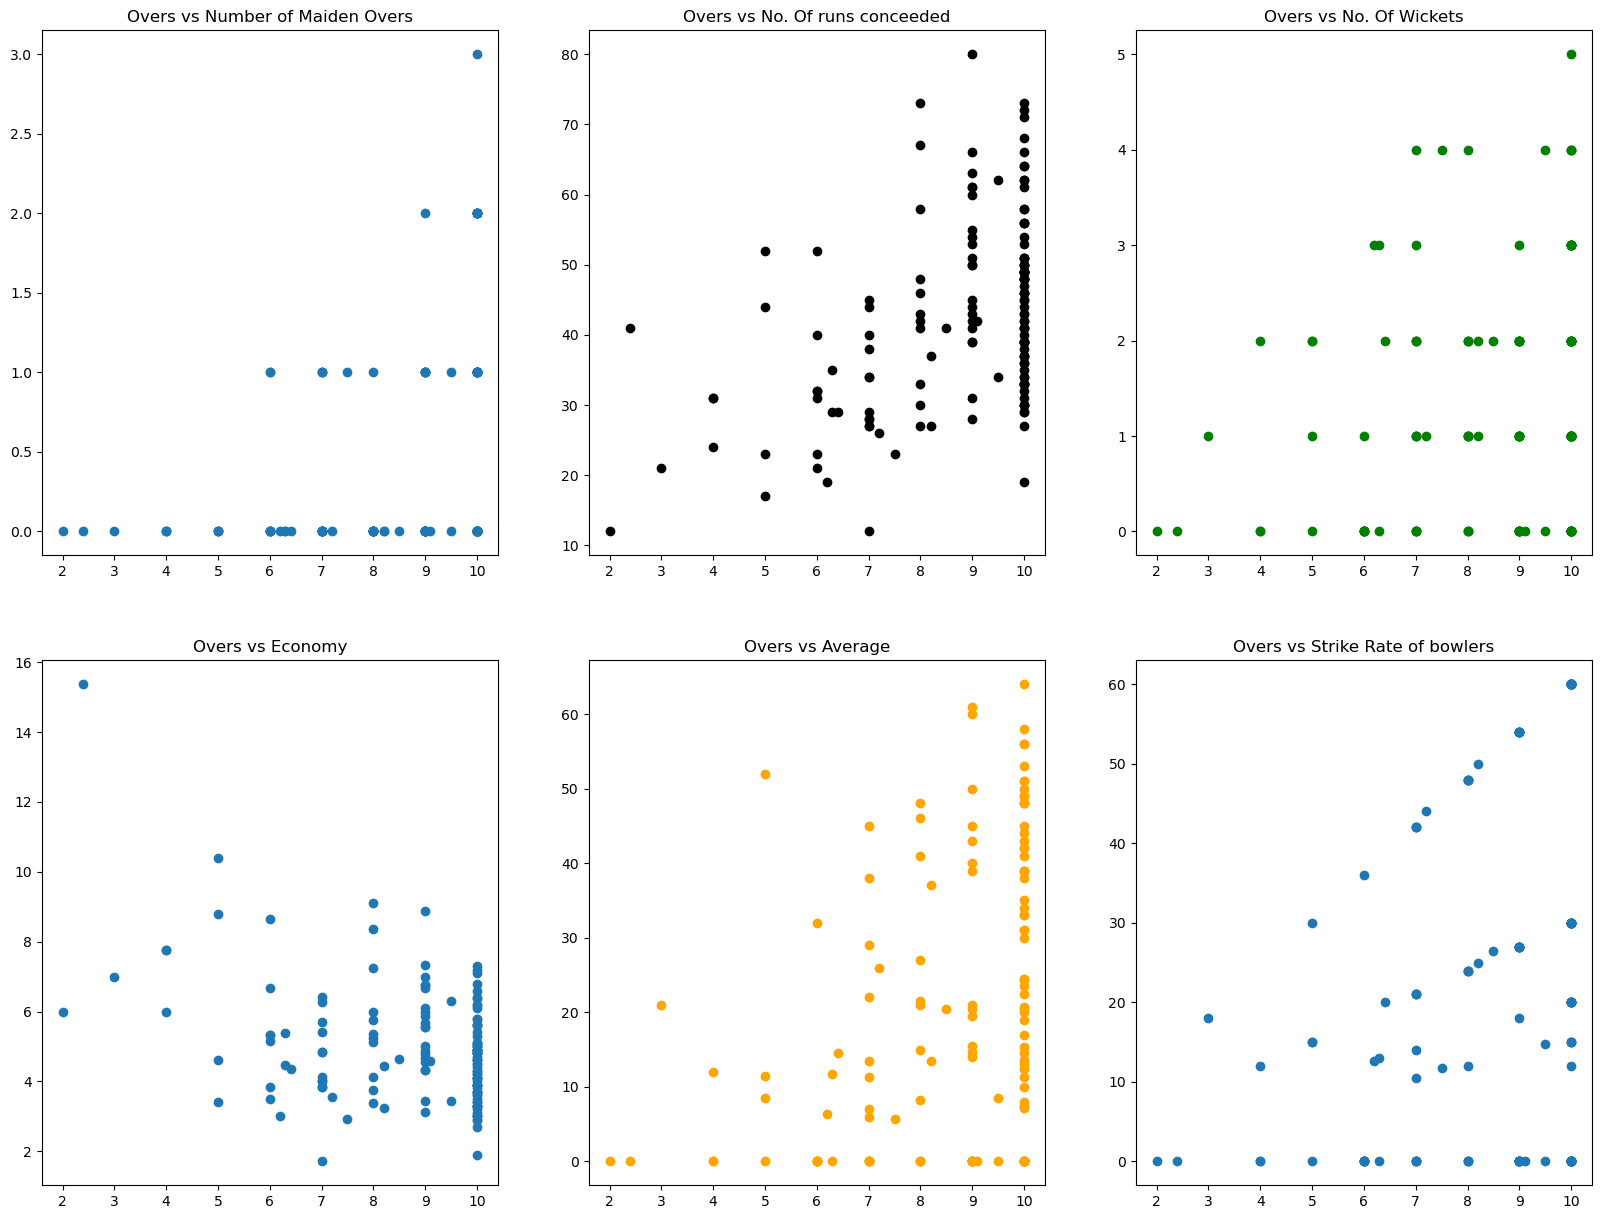

In [18]:
#Plotting the varuous graphs with Overs as X axis to understand the complete performance of a bowler
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(20, 15))
ax1.scatter(x, y1)
ax1.set_title('Overs vs Number of Maiden Overs')
ax2.scatter(x, y2, color='black')
ax2.set_title('Overs vs No. Of runs conceeded')
ax3.scatter(x, y3, color='green')
ax3.set_title('Overs vs No. Of Wickets')
ax4.scatter(x, y4)
ax4.set_title('Overs vs Economy')
ax5.scatter(x, y5, color='orange')
ax5.set_title('Overs vs Average')
ax6.scatter(x, y6)
ax6.set_title('Overs vs Strike Rate of bowlers')


In [19]:
#Gathering Data of one opponent induvidually
bdf_induvidual_opponence = bdf_induvidual.query('Opposition =="v Pakistan"')
bdf_induvidual_opponence

,Unnamed: 0,Overs,Mdns,Runs,Wkts,Econ,Ave,SR,Opposition,Ground,Start Date,Match_ID,Bowler,Player_ID
5410,5411,10.0,0.0,43.0,1.0,4.30,43.00,60.0,v Pakistan,Dambulla,19 Jun 2010,ODI # 2996,Ravindra Jadeja,234675
5441,5442,10.0,1.0,41.0,3.0,4.10,13.66,20.0,v Pakistan,Kolkata,3 Jan 2013,ODI # 3315,Ravindra Jadeja,234675
5442,5443,10.0,2.0,19.0,1.0,1.90,19.00,60.0,v Pakistan,Delhi,6 Jan 2013,ODI # 3316,Ravindra Jadeja,234675
5450,5451,8.0,1.0,30.0,2.0,3.75,15.00,24.0,v Pakistan,Birmingham,15 Jun 2013,ODI # 3372,Ravindra Jadeja,234675
5482,5483,10.0,1.0,61.0,0.0,6.10,0.00,0.0,v Pakistan,Dhaka,2 Mar 2014,ODI # 3479,Ravindra Jadeja,234675
5494,5495,10.0,0.0,56.0,1.0,5.60,56.00,60.0,v Pakistan,Adelaide,15 Feb 2015,ODI # 3602,Ravindra Jadeja,234675
5512,5513,8.0,0.0,43.0,2.0,5.37,21.50,24.0,v Pakistan,Birmingham,4 Jun 2017,ODI # 3878,Ravindra Jadeja,234675
5516,5517,8.0,0.0,67.0,0.0,8.37,0.00,0.0,v Pakistan,The Oval,18 Jun 2017,ODI # 3894,Ravindra Jadeja,234675
5520,5521,9.0,0.0,50.0,0.0,5.55,0.00,0.0,v Pakistan,Dubai (DSC),23 Sep 2018,ODI # 4044,Ravindra Jadeja,234675
